# BIRD SPECIES CLASSIFICATION USING CNN AND TRANSFER LEARNING

### Project Overview

In this project we'll try to predict birds species using an Dataset, which contains 89,885 images and 525 species. The dataset is already divided into training, validation and test sets (94%/3%/3%). Each species has 5 examples in validation and test sets. Images have high quality (224 X 224 X 3). <br>
The link to the dataset page in Kaggle:[BIRDS 525 SPECIES](https://www.kaggle.com/datasets/gpiosenka/100-bird-species/data)

The notebook contains the following sections:<br>
1)Imports and Data Preprocessing <br>
2)The Base Model <br>
3)Fine-Tuning <br>

### Imports

In [1]:
#DS libraries
import os
import random
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Tensorflow libraries
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, GlobalAveragePooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

C:\Users\sirak\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Data Preprocessing

In [2]:
# First let's have a quick look at our train data using the os.walk function
train="C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/"
for dirpath, dirnames, filenames in os.walk(train):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 525 directories and 0 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/
There are 0 directories and 163 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/ABBOTTS BABBLER
There are 0 directories and 180 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/ABBOTTS BOOBY
There are 0 directories and 179 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/ABYSSINIAN GROUND HORNBILL
There are 0 directories and 135 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/AFRICAN CROWNED CRANE
There are 0 directories and 154 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/AFRICAN EMERALD CUCKOO
There are 0 directories and 137 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/AFRICAN FIREFIN

There are 0 directories and 185 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/BLUE GROUSE
There are 0 directories and 167 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/BLUE HERON
There are 0 directories and 186 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/BLUE MALKOHA
There are 0 directories and 198 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/BLUE THROATED PIPING GUAN
There are 0 directories and 150 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/BLUE THROATED TOUCANET
There are 0 directories and 157 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/BOBOLINK
There are 0 directories and 154 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/BORNEAN BRISTLEHEAD
Ther

There are 0 directories and 152 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/EMPEROR PENGUIN
There are 0 directories and 163 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/EMU
There are 0 directories and 165 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/ENGGANO MYNA
There are 0 directories and 166 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/EURASIAN BULLFINCH
There are 0 directories and 130 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/EURASIAN GOLDEN ORIOLE
There are 0 directories and 154 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/EURASIAN MAGPIE
There are 0 directories and 135 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/EUROPEAN GOLDFINCH
There ar

There are 0 directories and 183 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/INDIAN ROLLER
There are 0 directories and 150 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/INDIAN VULTURE
There are 0 directories and 153 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/INDIGO BUNTING
There are 0 directories and 152 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/INDIGO FLYCATCHER
There are 0 directories and 161 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/INLAND DOTTEREL
There are 0 directories and 149 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/IVORY BILLED ARACARI
There are 0 directories and 156 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/IVORY GULL
There ar

There are 0 directories and 154 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/PHILIPPINE EAGLE
There are 0 directories and 154 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/PINK ROBIN
There are 0 directories and 200 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/PLUSH CRESTED JAY
There are 0 directories and 140 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/POMARINE JAEGER
There are 0 directories and 166 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/PUFFIN
There are 0 directories and 185 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/PUNA TEAL
There are 0 directories and 153 images in C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/train/PURPLE FINCH
There are 0 directories an

As we can see from the first row of the output, our train data has 525 directories, one for each bird species. Now let's create a function to visualize images randomly.

In [3]:
def visualize_random_image(directory, img_class):
    folder=directory+img_class
    random_image=random.sample(os.listdir(folder), 1)
    image=mpimg.imread(folder+"/"+random_image[0])
    plt.imshow(image)
    plt.title(img_class)
    plt.axis("off")

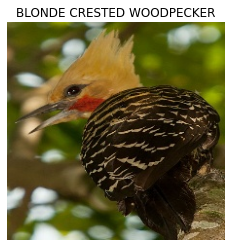

In [4]:
#Let's test our function
visualize_random_image(train, "BLONDE CRESTED WOODPECKER")

In [5]:
#Adding the directory paths to validation and test data
valid="C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/valid/"
test="C:/Users/sirak/OneDrive/Desktop/Springboard/Bird Species Image Classification/test/"

In [6]:
#Next we need to rescale and transfer our data from directories to batches
train_gen=ImageDataGenerator(rescale=1./255)
valid_gen=ImageDataGenerator(rescale=1./255)
test_gen=ImageDataGenerator(rescale=1./255)

train_data=train_gen.flow_from_directory(directory=train,
                                        batch_size=32,
                                        target_size=(224,224),
                                        class_mode="categorical")

valid_data=valid_gen.flow_from_directory(directory=valid,
                                        batch_size=32,
                                        target_size=(224,224),
                                        class_mode="categorical")
test_data=test_gen.flow_from_directory(directory=test,
                                        batch_size=32,
                                        target_size=(224,224),
                                        class_mode="categorical")

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


### Base Model training and evaluation

In [7]:
#Let's start our modeling process with a InceptionV3 model using Transfer Learning
model=InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable=False
inputs=Input(shape=(224,224,3), name="input_layer")

In [8]:
#Now, we need to start building our model:
x=model(inputs)
print(f"Shape after passing the inputs:{x.shape}")

x=GlobalAveragePooling2D(name="global_avg_pooling")(x)
print(f"Shape after GlobalAveragePooling2D:{x.shape}")

outputs=Dense(525, activation="softmax", name="output_layer")(x)


Shape after passing the inputs:(None, 5, 5, 2048)
Shape after GlobalAveragePooling2D:(None, 2048)


In [9]:
#Combining the inputs with outputs into a model and compiling it
model_1=Model(inputs, outputs)
model_1.compile(loss='categorical_crossentropy',
               optimizer=Adam(),
               metrics=["accuracy"])



In [10]:
history=model_1.fit(train_data,
                   epochs=10,
                   validation_data=valid_data,
                   validation_steps=int(0.25*len(valid_data)))

Epoch 1/10


C:\Users\sirak\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2645/2645 ━━━━━━━━━━━━━━━━━━━━ 4111s 2s/step - accuracy: 0.4642 - loss: 2.6201 - val_accuracy: 0.7391 - val_loss: 0.9973
Epoch 2/10
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 3843s 1s/step - accuracy: 0.7718 - loss: 0.8743 - val_accuracy: 0.7922 - val_loss: 0.8182
Epoch 3/10
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 3705s 1s/step - accuracy: 0.8286 - loss: 0.6392 - val_accuracy: 0.7797 - val_loss: 0.8644
Epoch 4/10
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 3633s 1s/step - accuracy: 0.8609 - loss: 0.4940 - val_accuracy: 0.8266 - val_loss: 0.6409
Epoch 5/10
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 3612s 1s/step - accuracy: 0.8845 - loss: 0.4075 - val_accuracy: 0.8000 - val_loss: 0.7568
Epoch 6/10


C:\Users\sirak\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2645/2645 ━━━━━━━━━━━━━━━━━━━━ 3629s 1s/step - accuracy: 0.9026 - loss: 0.3355 - val_accuracy: 0.8172 - val_loss: 0.7955
Epoch 7/10
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 3640s 1s/step - accuracy: 0.9170 - loss: 0.2823 - val_accuracy: 0.8281 - val_loss: 0.7944
Epoch 8/10
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 3649s 1s/step - accuracy: 0.9239 - loss: 0.2544 - val_accuracy: 0.8531 - val_loss: 0.6447
Epoch 9/10
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 3641s 1s/step - accuracy: 0.9343 - loss: 0.2151 - val_accuracy: 0.8375 - val_loss: 0.7316
Epoch 10/10
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 3648s 1s/step - accuracy: 0.9453 - loss: 0.1794 - val_accuracy: 0.8923 - val_loss: 0.8569


In [11]:
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_avg_pooling                   │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 525)                 │       1,075,725 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,029,961 (95.48 MB)

 Trainable params: 1,075,725 (4.10 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 2,151,452 (8.21 MB)

In [12]:
#Now let's try to classify our test data using this model
model_1.evaluate(test_data)

83/83 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.8857 - loss: 0.5413


[0.5320146679878235, 0.8841904997825623]

Let's create a custom function to visualize the loss function and accuracy for the training and validation datasets.

In [17]:
def plot_loss_acc(history):
    tr_loss=history.history["loss"]
    val_loss=history.history["val_loss"]
    
    tr_acc=history.history["accuracy"]
    val_acc=history.history["val_accuracy"]
    
    epochs=range(len(history.history['loss']))
    
    plt.plot(epochs, tr_loss, label="Training Loss")
    plt.plot(epochs, val_loss, label="Val Loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()
    
    plt.plot(epochs, tr_acc, label="Training Accuracy")
    plt.plot(epochs, val_acc, label="Val Accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

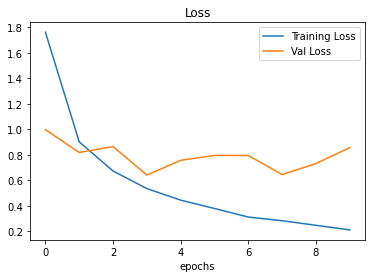

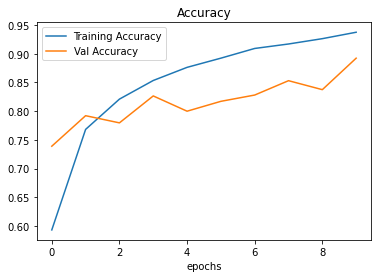

In [18]:
plot_loss_acc(history)

Our model showed pretty impressive results on our test data, but let's try to improve the results by setting the last 10 layers of our model as trainable.

In [15]:
model.trainable=True

for layer in model.layers[:-10]:
    layer.trainable=False
    
#Recompile the model
model_1.compile(loss='categorical_crossentropy',
               optimizer=Adam(learning_rate = 0.001),
               metrics=["accuracy"])

In [19]:
#Now we will add one more epoch and start the final epoch where the base model training ended
epochs_2=11
history_2=model_1.fit(train_data,
                   epochs=epochs_2,
                   validation_data=valid_data,
                   validation_steps=int(0.25*len(valid_data)),
                   initial_epoch = history.epoch[-1])

Epoch 10/11
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 5955s 2s/step - accuracy: 0.9388 - loss: 0.2020 - val_accuracy: 0.8469 - val_loss: 0.6790
Epoch 11/11
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 4454s 2s/step - accuracy: 0.9529 - loss: 0.1513 - val_accuracy: 0.8656 - val_loss: 0.6681


In [20]:
model_1.evaluate(test_data)

83/83 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.8745 - loss: 0.5081


[0.5335125923156738, 0.8799999952316284]

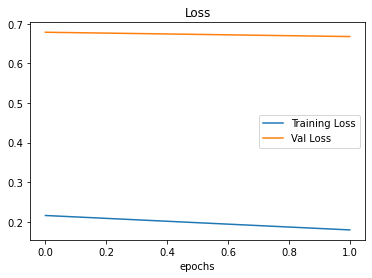

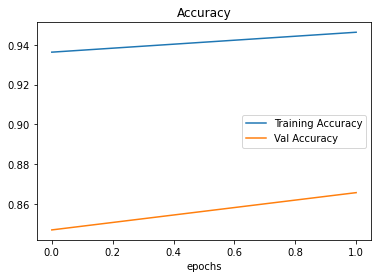

In [21]:
plot_loss_acc(history_2)